In [1]:
import nrrd
import pandas as pd
from NoduleNet.utils.visualize import *
from NoduleNet.utils.util import *
from NoduleNet.config import config

In [2]:
def load_img(data_dir, path_to_img):
    if path_to_img.startswith('LKDS'):
        img = np.load(os.path.join(data_dir, '%s_clean.npy' % (path_to_img)))
    else:
        img, _ = nrrd.read(os.path.join(data_dir, '%s_clean.nrrd' % (path_to_img)))
    img = img[np.newaxis, ...]

    return img


def load_mask(data_dir, filename):
    mask, _ = nrrd.read(os.path.join(data_dir, '%s_mask.nrrd' % (filename)))

    return mask

data_dir = config['DATA_DIR']
out_dir = os.path.join(config["out_dir"])
load_dir = os.path.join(out_dir, 'res', str(200))

rpns = pd.read_csv(load_dir + "\FROC\submission_rpn.csv")

In [3]:
uid = rpns.seriesuid.unique()[1]

In [4]:
image = load_img(data_dir, uid)

In [5]:
pred = np.load(os.path.join(load_dir, uid + ".npy"))
pred_contours = get_contours_from_masks(pred[np.newaxis, :])[0]

gt = load_mask(data_dir, uid)
gt_contours = get_contours_from_masks(gt[np.newaxis, :])[0]

# get the row of the highest prediction
uid_nodules = rpns[(rpns.seriesuid == uid)]
uid_max_prob = uid_nodules[uid_nodules.probability >= 0.95]

In [6]:
_, nodule = list(uid_max_prob.iterrows())[0]

In [7]:
nodule

seriesuid      1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162...
coordX                                                  95.53273
coordY                                                 180.85432
coordZ                                                  83.69924
diameter_mm                                             21.06862
probability                                             0.999601
Name: 11, dtype: object

In [8]:
bbox = np.array([nodule.coordZ, nodule.coordY, nodule.coordX], dtype=np.int16)
radius = int(nodule.diameter_mm / 2) + 1
start = bbox - radius
end   = bbox + radius

IntSlider(value=0, continuous_update=False, description='z', max=231)

IntSlider(value=128, continuous_update=False, description='level', max=1000, min=-1024)

IntSlider(value=200, continuous_update=False, description='width', max=2000, min=-1024)

Checkbox(value=True, description='show mask')

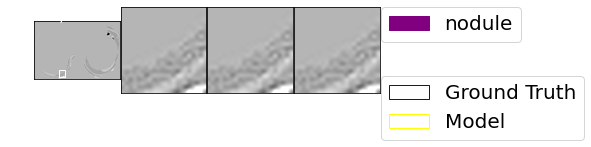

In [9]:
show3D_comparison(image[0], [gt, gt_contours], [pred, pred_contours], [start, end], save_dir='my_figs/',
                  show_all_legend=True)

In [10]:
show_image_and_mask(pred)

interactive(children=(IntSlider(value=0, description='k', max=239), Output()), _dom_classes=('widget-interact'…

In [11]:
# Image
show_image_and_mask(image[0])

interactive(children=(IntSlider(value=0, description='k', max=231), Output()), _dom_classes=('widget-interact'…

In [12]:
norm_img = normalize(image[0]) # values 0 to 1
padded_img = pad2factor(norm_img) # padded corners with 2 pixels of 0s

padded_img.shape, pred.shape

((240, 208, 304), (240, 208, 304))

In [13]:
d_pred = draw_pred(padded_img, pred)

In [14]:
d_pred.min(), d_pred.max()

(0.0, 1.0)

### Draw Pred

In [15]:
show_image_and_mask(pred)

interactive(children=(IntSlider(value=0, description='k', max=239), Output()), _dom_classes=('widget-interact'…

In [16]:
show_image_and_mask(d_pred)

interactive(children=(IntSlider(value=0, description='k', max=239), Output()), _dom_classes=('widget-interact'…

### Draw GT

In [ ]:
# GroundTruth
d_gt = draw_gt(norm_img, gt)

In [ ]:
show_image_and_mask(gt)

In [ ]:
show_image_and_mask(d_gt)

### Animate Preds

In [ ]:
generate_image_anim(d_pred, save_path="my_figs/pred_anim.mp4")

In [ ]:
generate_image_anim(d_gt, save_path="my_figs/gt_anim.mp4")

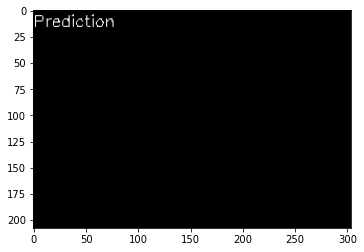

In [26]:
generate_image_anim(d_pred, save_path="my_figs/pred_anim.mp4")

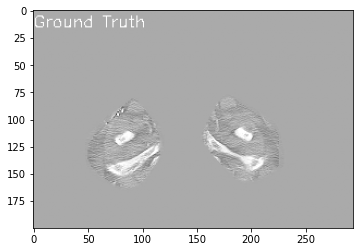

In [23]:
generate_image_anim(d_gt, save_path="my_figs/gt_anim.mp4")

### Get Contours

In [ ]:
contours = get_contours_from_masks(pred)

### Create 3D Mesh

In [ ]:
len(contours)

In [ ]:
contours.shape